In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 3.1 Line and Bar Charts

In [3]:
data1 = pd.read_csv('hire2FTE.csv')
data1.head()

,Transactions,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,Received,160,170,240,140,175,155,130,200,160,140,150,175
1,Processed,160,170,240,140,175,150,125,170,135,130,125,150


In [4]:
received = data1.loc[0, 'Jan':'Dec']
processed = data1.loc[1, 'Jan':'Dec']

In [5]:
transactions = data1.melt(id_vars='Transactions', var_name='Month')
transactions.head()

,Transactions,Month,value
0,Received,Jan,160
1,Processed,Jan,160
2,Received,Feb,170
3,Processed,Feb,170
4,Received,Mar,240


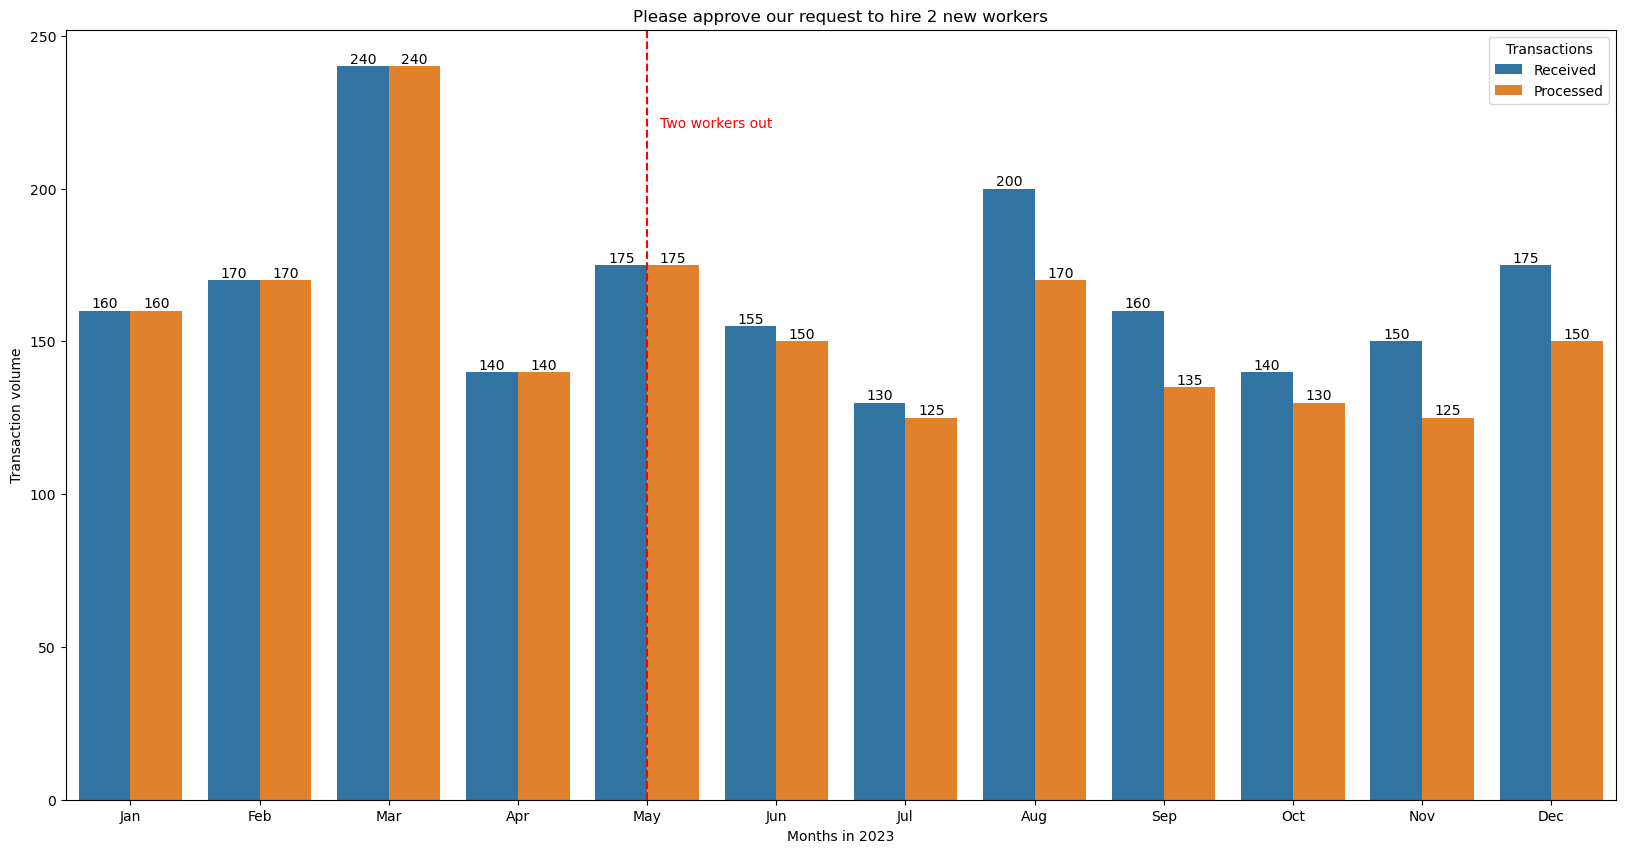

In [6]:
f, axes = plt.subplots(figsize=(20, 10))
bar = sns.barplot(data=transactions,
                   x='Month',
                   y='value',
                   hue='Transactions')
bar.set(title='Please approve our request to hire 2 new workers',
        xlabel='Months in 2023',
        ylabel='Transaction volume')
plt.axvline(x=4, linestyle='--', color='red')
plt.text(x=4.1, y=220, s='Two workers out', color='red')
for i in bar.containers:
    bar.bar_label(i,)

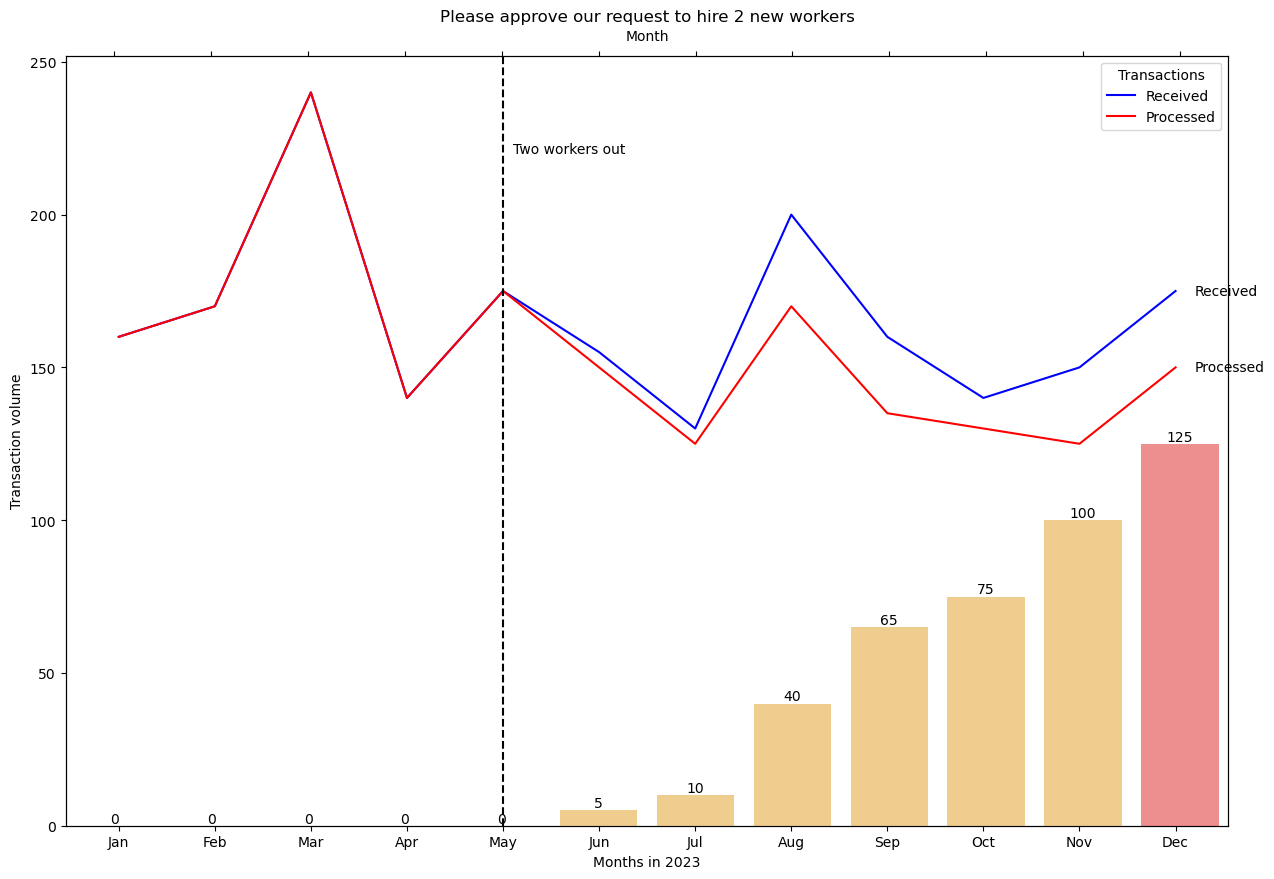

In [7]:
f, axes = plt.subplots(figsize=(15, 10), sharey=True)

line = sns.lineplot(data=transactions,
                   x='Month',
                   y='value',
                   hue='Transactions',
                   palette=['b', 'r'])
line.tick_params(right=False, top=False)

line.set(title='Please approve our request to hire 2 new workers',
        xlabel='Months in 2023',
        ylabel='Transaction volume')
plt.axvline(x=4, linestyle='--', color='black')
plt.text(x=4.1, y=220, s='Two workers out', color='black')

last_values = transactions[['Transactions', 'value']][transactions['Month'] == 'Dec']
for transaction_type, value in last_values.itertuples(index=False):
    plt.text(x=11.2, y=value, s=transaction_type, va="center")
    
diff = pd.DataFrame(received - processed).reset_index()
diff = diff.rename({'index': 'Month', 0: 'value'}, axis=1)
diff['total'] = diff['value'].rolling(min_periods=1, window=12).sum()
clrs = ['orange' if (x < max(diff['total'])) else 'red' for x in diff['total'] ]
ax2 = axes.twiny()
diff_bar = sns.barplot(data=diff,
                       x='Month',
                       y='total',
                       alpha=0.5,
                       palette=clrs,
                       ax=ax2)

ax2.set_xticklabels([])
for i in diff_bar.containers:
    diff_bar.bar_label(i,)
plt.show()

# 3.4 Analysing Relationships


In [8]:
real_estate = pd.read_csv('Real estate.csv')
real_estate.head()

,No,transaction date,house age,distance to the nearest MRT station,number of convenience stores,latitude,longitude,house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


## Distance to MRT vs house price

<Axes: xlabel='distance to the nearest MRT station', ylabel='house price of unit area'>

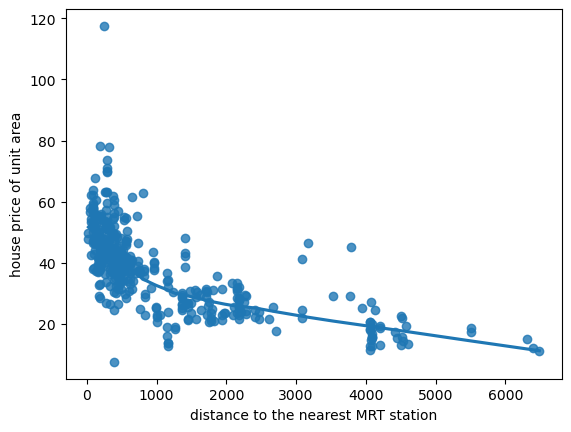

In [9]:
sns.regplot(data=real_estate,
             x='distance to the nearest MRT station',
             y='house price of unit area',
             lowess=True)

Houses nearer to any MRT station are usually more expensive, compared to further ones.

## House age vs price

<Axes: xlabel='house age', ylabel='house price of unit area'>

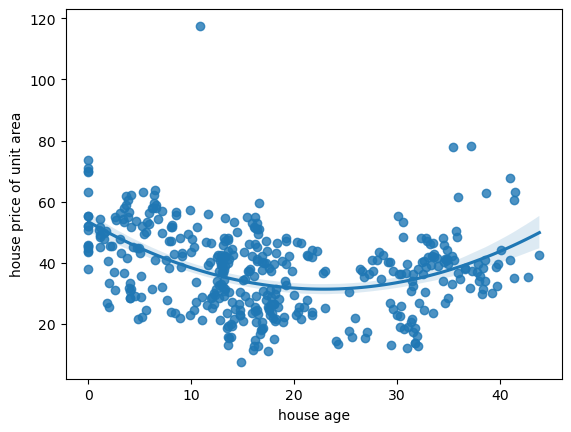

In [10]:
sns.regplot(x='house age',
            y='house price of unit area',
            data=real_estate,
            order=2)

Mid range houses are cheaper, while new ones and really old ones are more expensive

## House age vs Distance to MRT

<Axes: xlabel='house age', ylabel='distance to the nearest MRT station'>

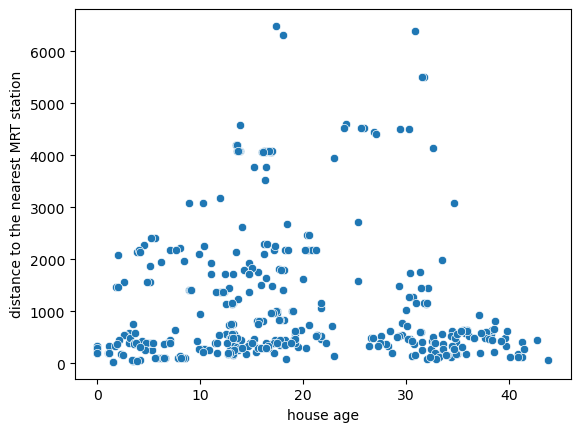

In [11]:
sns.scatterplot(x='house age',
                y='distance to the nearest MRT station',
                data=real_estate)

Mid range age tend to be further from the MRT, while really old houses are really near MRT.

## Number of convenient stores

<Axes: xlabel='number of convenience stores', ylabel='house price of unit area'>

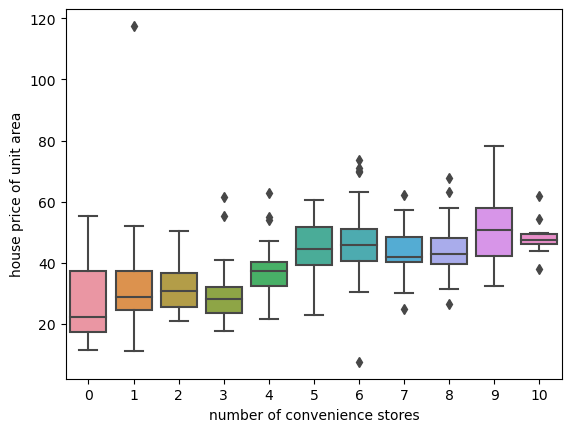

In [12]:
sns.boxplot(data=real_estate,
             x='number of convenience stores',
             y='house price of unit area')

In general, houses with more convenience stores around it are more expensive

## Neighbourhood with many convenience stores

Can do, if you can attribute the coordinate to the neighbourhood.

# 3.5 Analysing Distribution

In [13]:
performance = pd.read_csv('Students performance.csv')
performance.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [26]:
melted = performance.melt(performance.columns[:-3], var_name='score_type',
                          value_name='score')
melted.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,score_type,score
0,female,group B,bachelor's degree,standard,none,math score,72
1,female,group C,some college,standard,completed,math score,69
2,female,group B,master's degree,standard,none,math score,90
3,male,group A,associate's degree,free/reduced,none,math score,47
4,male,group C,some college,standard,none,math score,76


## Gender vs. Score

<Axes: xlabel='score_type', ylabel='score'>

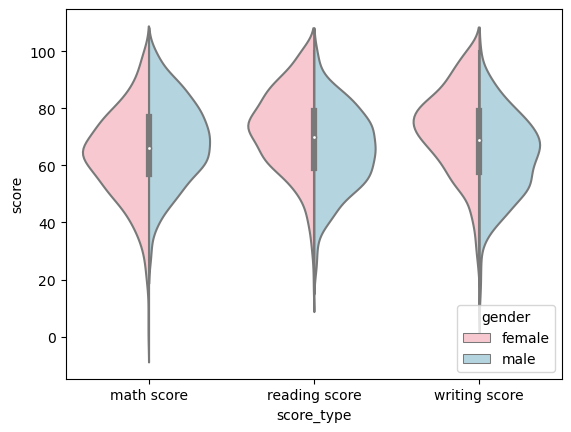

In [31]:
sns.violinplot(data=melted,
               y='score',
               x='score_type',
               hue='gender',
               palette=['pink','lightblue'],
               split=True)

Boys perform better in math, while girls perform better in reading and writing

## Toughest Subject

<Axes: xlabel='score_type', ylabel='score'>

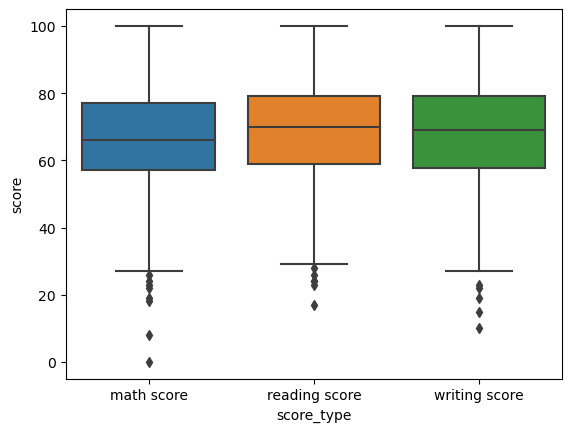

In [32]:
sns.boxplot(data=melted,
            x='score_type',
            y='score')

The toughest subject is math, with the lowest 50% percentile, and the highest number of people failing

## Test prep

In [34]:
median = melted.groupby(['test preparation course', 'score_type'])['score'].median()

<Axes: xlabel='score_type', ylabel='score'>

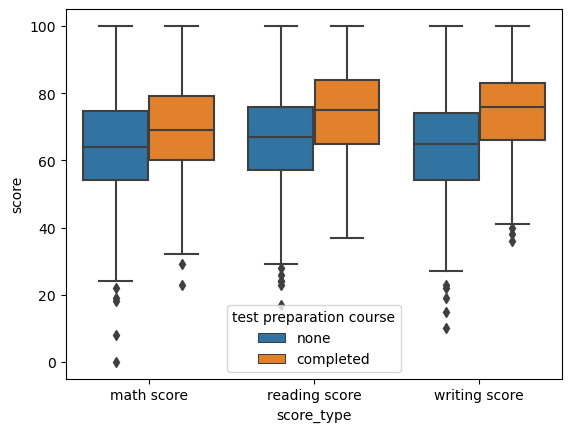

In [33]:
sns.boxplot(data=melted,
            x='score_type',
            y='score',
            hue='test preparation course')

## Ethnic Groups

<Axes: xlabel='score', ylabel='Density'>

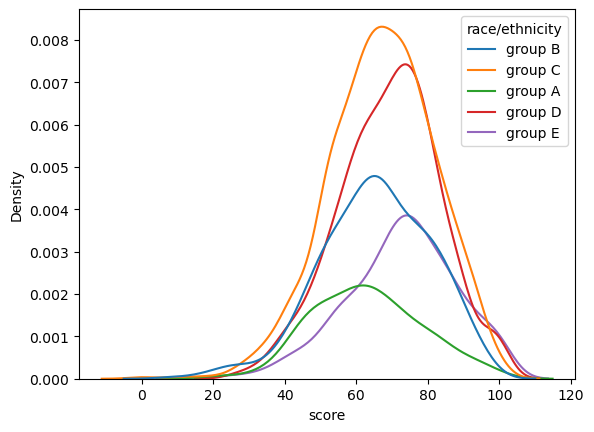

In [35]:
sns.kdeplot(data=melted,
            x='score',
            hue='race/ethnicity')

<Axes: xlabel='race/ethnicity', ylabel='math score'>

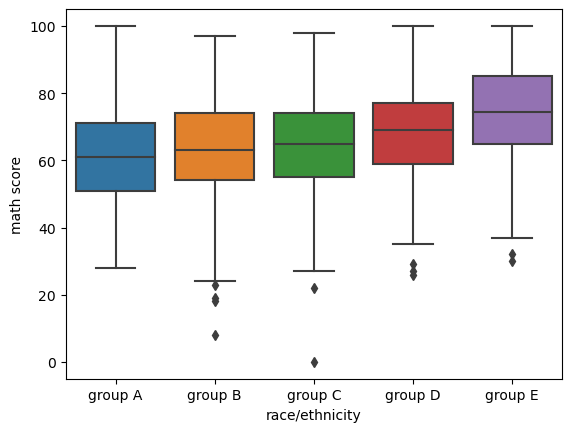

In [40]:
sns.boxplot(data=performance,
            x='race/ethnicity',
            y='math score',
            order=['group A', 'group B', 'group C', 'group D', 'group E'])

<Axes: xlabel='race/ethnicity', ylabel='reading score'>

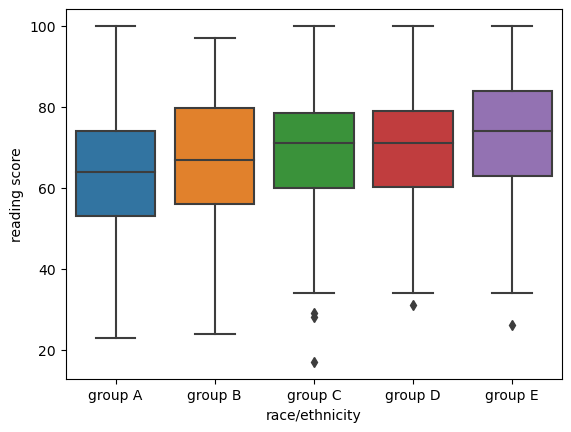

In [41]:
sns.boxplot(data=performance,
            x='race/ethnicity',
            y='reading score',
            order=['group A', 'group B', 'group C', 'group D', 'group E'])

<Axes: xlabel='race/ethnicity', ylabel='writing score'>

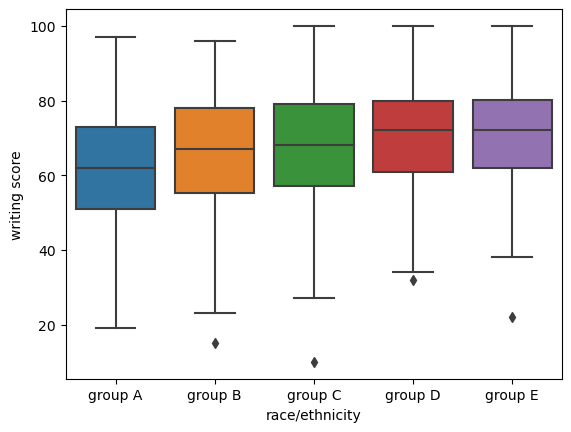

In [42]:
sns.boxplot(data=performance,
            x='race/ethnicity',
            y='writing score',
            order=['group A', 'group B', 'group C', 'group D', 'group E'])

## Parent's Education

<Axes: xlabel='score', ylabel='parental level of education'>

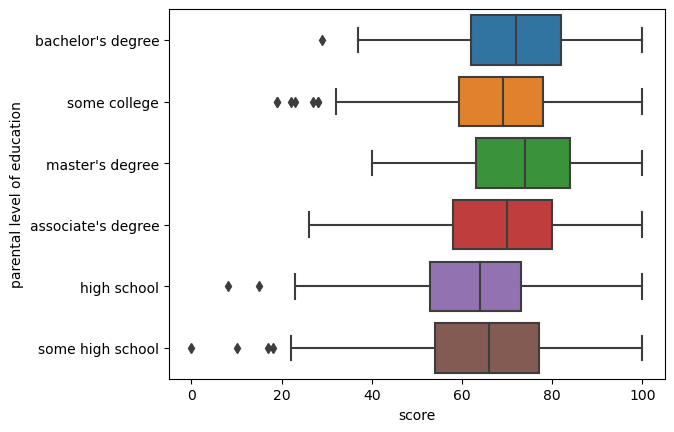

In [45]:
sns.boxplot(data=melted,
            y='parental level of education',
            x='score',
            orient='h')

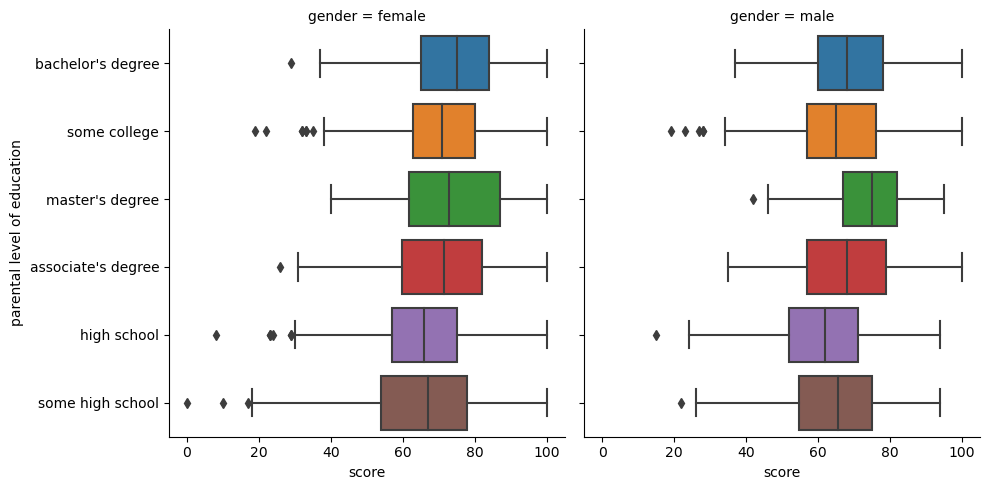

In [54]:
sns.catplot(data=melted,
            y='parental level of education',
            x='score',
            col='gender',
            kind='box',
            orient='h')